In [1]:
import liming as lim
import pandas as pd

# Modelling the effectiveness of lime types

As part of a project with Miljødirektoratet, we will build an app to model the effectiveness of different types of lime based on data from column tests. Kar-Jan Erstad (Rådgivende Agronomar AS) has provided a spreadsheet to illustrate the initial calculations. As a quick test, I have translated these to Python. Initial resulst are shown in this notebook.

**Note:** Karl-Jan's spreadsheet estimates the mean concentration at the middle of each depth interval and then calculates the integral as the sum of rectangular columns with heights equal to the mean depths. My version implements two alternative approaches: the [trapezoidal rule](https://en.wikipedia.org/wiki/Trapezoidal_rule) and [Simpson's rule](https://en.wikipedia.org/wiki/Simpson%27s_rule). In the code below, the integration method is selected by setting `method="trapezoidal"` or `method="simpson"`. These methods achieve essentially the same thing as Karl-Jan's approach, but should be a little more accurate (integrating is much easier in Python than in Excel).
 
**To do:**

 * I'm not sure how to get from these results to the `NV` values given in Karl Jan's other spreadsheet.
 
 * We need the equations required to estimating the dosing factor for different application methods in different lakes. These calculations need clarifying, but the app should use a "default" lake as standard (area, depth, residence time etc.), but also allow users to adjust these values. **Most of the work involved in this project will be getting the correct equations from old reports etc. and translating them to Python**.
 
 * Everything here needs tidying up to make the code clearer, more reusable and more transparent (this version is very rough).

In [2]:
data_path = r"../data/liming_app_test_data.xlsx"
inst_df = pd.read_excel(data_path, sheet_name="instantaneous_dissolution_data")
od_df = pd.read_excel(data_path, sheet_name="overdosing_data")

print("First 10 rows for 'instantaneous' dataset:")
display(inst_df.head(10))

print("First 10 rows for 'overdosing' dataset:")
display(od_df.head(10))

First 10 rows for 'instantaneous' dataset:


,Column,pH,Depth_m,Ca_mg/l
0,A,4.0,0.0,2.82
1,A,4.0,0.4,2.62
2,A,4.0,0.8,2.64
3,A,4.0,1.2,2.76
4,A,4.0,1.6,2.81
5,A,4.0,2.0,2.71
6,B,4.5,0.0,2.16
7,B,4.5,0.4,2.01
8,B,4.5,0.8,1.93
9,B,4.5,1.2,1.91


First 10 rows for 'overdosing' dataset:


,Column,pH,Lime_added_mg/l,Depth_m,Ca_mg/l
0,A,4.6,10,0.0,2.03
1,A,4.6,10,0.4,1.98
2,A,4.6,10,0.8,2.03
3,A,4.6,10,1.2,2.04
4,A,4.6,10,1.6,1.85
5,B,4.6,20,0.0,3.37
6,B,4.6,20,0.4,3.17
7,B,4.6,20,0.8,3.22
8,B,4.6,20,1.2,3.66
9,B,4.6,20,1.6,3.53


Processing data for product: Miljøkalk EY3

Total Ca content by mass: 38.5 %
Concentration of lime added: 10.0 mg/l
Ca concentration if all lime dissolved and well-mixed: 3.85 mg-Ca/l

Instantaneous dissolution for column tests (varying pH):
  Column A (pH 4.0): 70.6 %
  Column B (pH 4.5): 51.9 %
  Column C (pH 5.0): 44.5 %
  Column D (pH 5.5): 42.8 %
  Column E (pH 6.0): 37.5 %

Overdosing factors for column tests (at fixed pH):
  Overdosing factor (10.0 mg/l lime added): 1.00
  Overdosing factor (20.0 mg/l lime added): 1.18
  Overdosing factor (35.0 mg/l lime added): 1.54
  Overdosing factor (50.0 mg/l lime added): 2.21
  Overdosing factor (85.0 mg/l lime added): 3.38


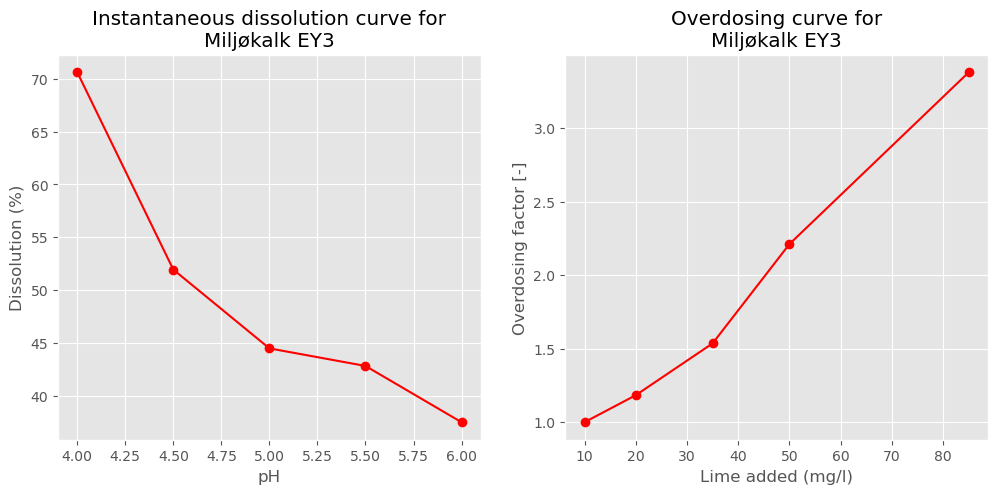

In [3]:
# Estimate instanteous dissolution and overdosing
lim.column_test_summary(data_path, method="trapezoidal")